#### **Load Iris** using sklearn and pandas

**Question 1**
reference: https://gist.github.com/srishtis/10d8e8cecfa128ff694bd8846f825135  
           https://towardsdatascience.com/how-to-use-scikit-learn-datasets-for-machine-learning-d6493b38eca3

In [225]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [226]:
data=datasets.load_iris()

In [227]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df['class']=data.target

In [228]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [229]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [231]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [232]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

In [233]:
df['sepal length (cm)'].fillna(df['sepal length (cm)'].mean())

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

In [234]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Question 2**

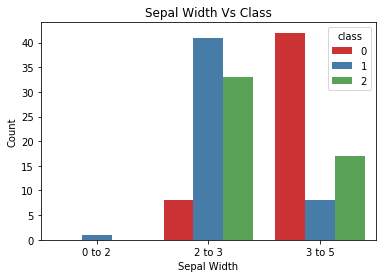

In [235]:
interval=(0,2,3,5)
categories=['0 to 2','2 to 3','3 to 5']
df['sw']=pd.cut(df['sepal width (cm)'],interval,labels=categories)
ax=sns.countplot(x='sw',hue='class',palette='Set1',data=df)
ax.set(title="Sepal Width Vs Class",xlabel='Sepal Width',ylabel="Count")
plt.show()

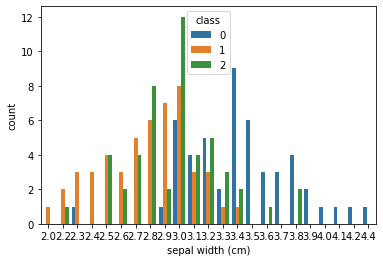

In [236]:
ax=sns.countplot(x='sepal width (cm)',hue='class',data=df)

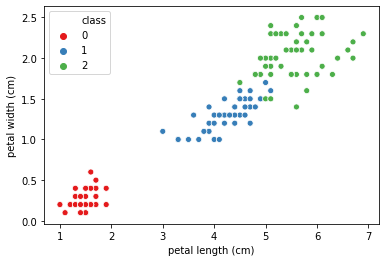

In [237]:
sns.scatterplot(x='petal length (cm)',y='petal width (cm)',hue='class',data=df,palette='Set1')

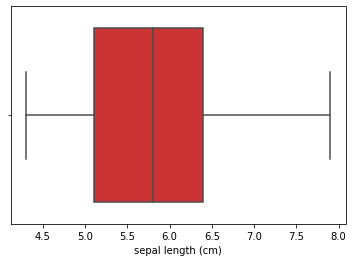

In [238]:
sns.boxplot(df['sepal length (cm)'],palette='Set1')

**Question 3**

**By creating own dataset and mlxtend**
reference: https://medium.com/learning-intelligence/understanding-and-implementation-of-apriori-algorithm-with-python-part-2-ff037ceab254

In [239]:
#!pip install mlxtend

In [240]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [241]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df1 = pd.DataFrame(te_ary, columns=te.columns_)
df1

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [242]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets=apriori(df1, min_support=0.6,use_colnames=True)
print(frequent_itemsets)

    support                     itemsets
0       0.8                       (Eggs)
1       1.0               (Kidney Beans)
2       0.6                       (Milk)
3       0.6                      (Onion)
4       0.6                     (Yogurt)
5       0.8         (Kidney Beans, Eggs)
6       0.6                (Onion, Eggs)
7       0.6         (Milk, Kidney Beans)
8       0.6        (Onion, Kidney Beans)
9       0.6       (Kidney Beans, Yogurt)
10      0.6  (Onion, Kidney Beans, Eggs)


In [243]:
result = association_rules(frequent_itemsets, metric = "confidence", min_threshold=0.01)
result.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,0.00,inf
2,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
4,(Milk),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
6,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
9,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
10,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
11,"(Onion, Eggs)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
13,(Onion),"(Kidney Beans, Eggs)",0.6,0.8,0.6,1.00,1.25,0.12,inf
0,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,0.00,1.0
3,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6


**Using association.csv and mlxtend**

In [244]:
df=pd.read_csv('association_analysis.csv')

In [245]:
df.head()

,tid,onion,tomato,potato,bottleguard,beans
0,1,1,0,1,0,0
1,2,1,0,0,1,1
2,3,0,0,1,0,0
3,4,0,1,1,1,1
4,5,1,1,1,0,0


In [246]:
df[['onion','tomato','potato','bottleguard','beans']]=df[['onion','tomato','potato','bottleguard','beans']].astype(int)

reference: https://stackoverflow.com/questions/29960733/how-to-convert-true-false-values-in-dataframe-as-1-for-true-and-0-for-false

In [247]:
df.drop(columns=['tid'],inplace=True)
df.head()

,onion,tomato,potato,bottleguard,beans
0,1,0,1,0,0
1,1,0,0,1,1
2,0,0,1,0,0
3,0,1,1,1,1
4,1,1,1,0,0


In [248]:
apriori(df,min_support=0.3,use_colnames=True)

,support,itemsets
0,0.509804,(onion)
1,0.568627,(tomato)
2,0.509804,(potato)
3,0.470588,(bottleguard)
4,0.490196,(beans)
5,0.313725,"(beans, tomato)"


Using association.csv and apyori library

**Question 4**  
reference: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/fpgrowth/

In [249]:
from mlxtend.frequent_patterns import fpgrowth

In [250]:
frequent_itemsets=fpgrowth(df1,min_support=0.6,use_colnames=True)

In [251]:
result = association_rules(frequent_itemsets, metric = "confidence", min_threshold=0.01)
result.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,0.00,inf
3,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
4,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
6,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
8,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
9,"(Onion, Eggs)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
11,(Onion),"(Kidney Beans, Eggs)",0.6,0.8,0.6,1.00,1.25,0.12,inf
14,(Milk),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
0,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,0.00,1.0
5,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6


**Question 5**

In [252]:
data=datasets.load_iris()

In [253]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df['class']=data.target

In [254]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


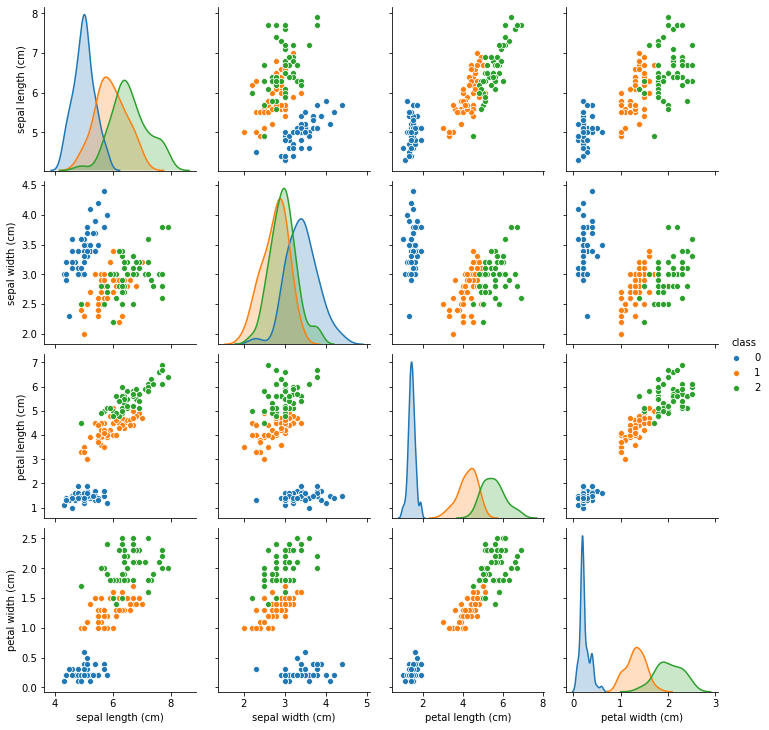

In [255]:
sns.pairplot(df,hue='class')

In [256]:
feature_columns = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
X=df[feature_columns].values
y=df['class'].values

In [264]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [258]:
#train,test=train_test_split(df,train_size=0.7,random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [259]:
# x_train=train.iloc[:,:-1]
# y_train=train.iloc[:,-1]

# x_test=test.iloc[:,:-1]
# y_test=test.iloc[:,-1]

In [260]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [261]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [262]:
confusion_matrix(y_pred, y_test)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [265]:
accuracy_score(y_pred,y_test)

1.0

In [266]:
#precision_score(y_pred_y_test)
#recall_score(y_pred,y_test)

[Text(334.8, 498.3, 'petal length (cm) <= 2.35\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]\nclass = virginica'),
 Text(283.2923076923077, 407.70000000000005, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = setosa'),
 Text(386.3076923076923, 407.70000000000005, 'petal width (cm) <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]\nclass = virginica'),
 Text(206.03076923076924, 317.1, 'petal length (cm) <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]\nclass = versicolor'),
 Text(103.01538461538462, 226.5, 'petal width (cm) <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = versicolor'),
 Text(51.50769230769231, 135.89999999999998, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = versicolor'),
 Text(154.52307692307693, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(309.04615384615386, 226.5, 'petal width (cm) <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = virginica'),
 Text(257.538461

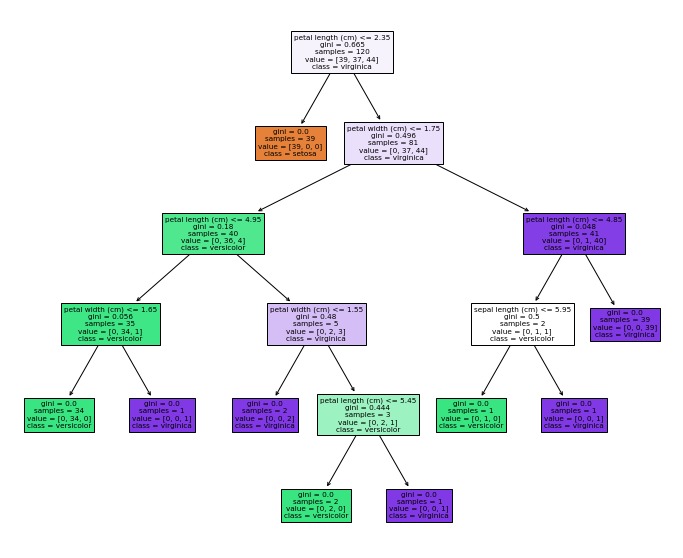

In [267]:
from sklearn import tree

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
plt.figure(figsize=[12,10])
tree.plot_tree(clf, feature_names = fn, class_names=cn, filled = True)

In [270]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
    
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)

In [271]:
accuracy_score(y_pred,y_test)

0.9666666666666667

**Question 7** 

In [272]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
y = kmeans.fit_predict(X)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


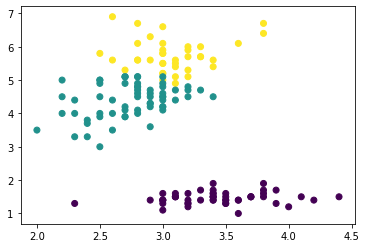

In [275]:
plt.scatter(X[:,1],X[:,2],c=y)

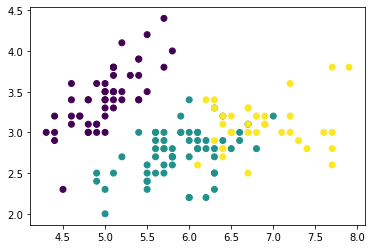

In [276]:
plt.scatter(X[:,0],X[:,1],c=y)

**Question 8**

In [277]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
y = dbscan.fit_predict(X)

In [278]:
print(y)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


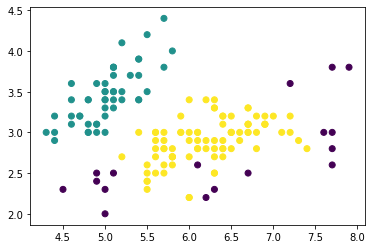

In [279]:
plt.scatter(X[:,0], X[:,1], c=y)

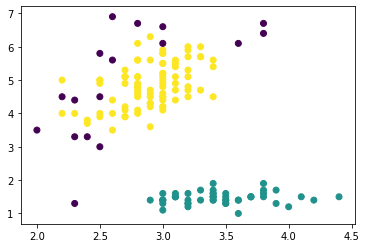

In [280]:
plt.scatter(X[:,1], X[:,2], c=y)

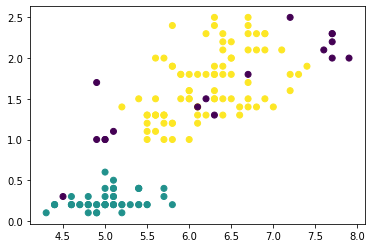

In [281]:
plt.scatter(X[:,0], X[:,3], c=y)

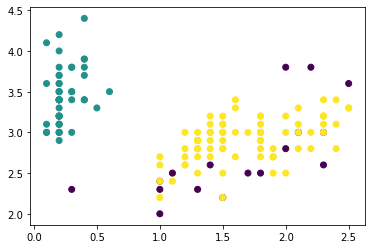

In [282]:
plt.scatter(X[:,3], X[:,1], c=y)

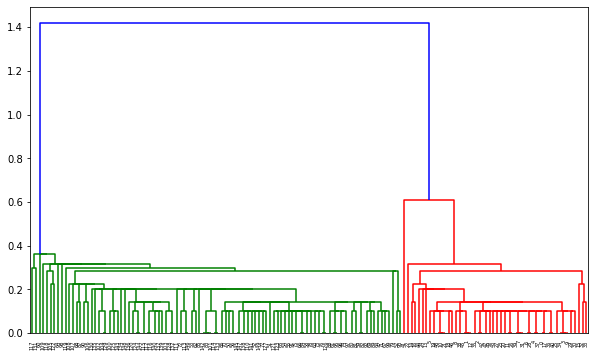

In [283]:
from scipy.cluster.hierarchy import dendrogram, linkage

links = linkage(X[:, 1:3], 'single')

plt.figure(figsize=(10, 6))

dendrogram(links, orientation='top', distance_sort='descending', show_leaf_counts=True)

plt.show()